# Credit Card Fraud Transaction Detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("fraud_data.csv")

### Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14446 non-null  object 
 1   merchant               14446 non-null  object 
 2   category               14446 non-null  object 
 3   amt                    14446 non-null  float64
 4   city                   14446 non-null  object 
 5   state                  14446 non-null  object 
 6   lat                    14446 non-null  float64
 7   long                   14446 non-null  float64
 8   city_pop               14446 non-null  int64  
 9   job                    14446 non-null  object 
 10  dob                    14446 non-null  object 
 11  trans_num              14446 non-null  object 
 12  merch_lat              14446 non-null  float64
 13  merch_long             14446 non-null  float64
 14  is_fraud               14446 non-null  object 
dtypes:

In [4]:
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1


In [5]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], errors='coerce')

In [6]:
df['trans_date'] = df['trans_date_trans_time'].dt.date
df['trans_hour'] = df['trans_date_trans_time'].dt.hour

In [7]:
df['is_fraud'] = df['is_fraud'].astype(str).str.extract('(\d+)').astype(int)

In [8]:
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values[missing_values > 0])


Missing Values:
 Series([], dtype: int64)


### Statistical properties of Data

In [9]:
df.describe()

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,trans_hour
count,14446.000000,14446.000000,14446.000000,1.444600e+04,14446.000000,14446.000000,14446.000000,14446.000000
mean,124.430073,39.787692,-110.874225,1.065370e+05,39.787991,-110.874892,0.127717,13.034681
std,231.352587,5.317039,12.985813,2.902916e+05,5.360593,12.995596,0.333786,7.290632
min,1.000000,20.027100,-165.672300,4.600000e+01,19.032689,-166.670685,0.000000,0.000000
25%,12.080000,36.715400,-120.415800,4.930000e+02,36.794655,-120.146253,0.000000,7.000000
50%,51.520000,39.666200,-111.098500,1.645000e+03,39.620953,-111.192629,0.000000,14.000000
75%,101.030000,41.940400,-101.136000,3.543900e+04,42.275740,-100.446822,0.000000,20.000000
max,3261.470000,66.693300,-89.628700,2.383912e+06,67.510267,-88.646366,1.000000,23.000000


In [10]:
mean_values = df.mean(numeric_only=True)
mode_values = df.mode().iloc[0]
median_values = df.median(numeric_only=True)
print("\nMean Values:\n", mean_values)
print("\nMode Values:\n", mode_values)
print("\nMedian Values:\n", median_values)


Mean Values:
 amt              124.430073
lat               39.787692
long            -110.874225
city_pop      106537.002838
merch_lat         39.787991
merch_long      -110.874892
is_fraud           0.127717
trans_hour        13.034681
dtype: float64

Mode Values:
 trans_date_trans_time                 2019-01-21 23:09:00
merchant                                      Kilback LLC
category                                      grocery_pos
amt                                                  1.64
city                                              Phoenix
state                                                  CA
lat                                               38.7897
long                                             -93.8702
city_pop                                        1312922.0
job                                  "Surveyor, minerals"
dob                                            17-07-1989
trans_num                049087fe5d27b77c7238fa46bb18c99d
merch_lat                          

In [11]:
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)


Number of duplicate rows: 63


In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14383 entries, 0 to 14445
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  14383 non-null  datetime64[ns]
 1   merchant               14383 non-null  object        
 2   category               14383 non-null  object        
 3   amt                    14383 non-null  float64       
 4   city                   14383 non-null  object        
 5   state                  14383 non-null  object        
 6   lat                    14383 non-null  float64       
 7   long                   14383 non-null  float64       
 8   city_pop               14383 non-null  int64         
 9   job                    14383 non-null  object        
 10  dob                    14383 non-null  object        
 11  trans_num              14383 non-null  object        
 12  merch_lat              14383 non-null  float64       
 13  m

### Transaction Patterns Analysis

### Time analysis

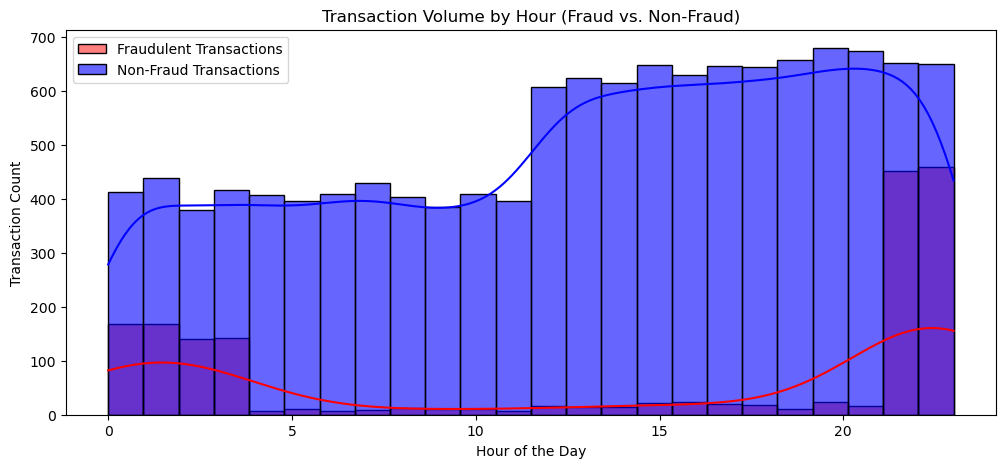

In [14]:
plt.figure(figsize=(12, 5))
sns.histplot(df[df['is_fraud'] == 1]['trans_hour'], bins=24, kde=True, color='red', label='Fraudulent Transactions')
sns.histplot(df[df['is_fraud'] == 0]['trans_hour'], bins=24, kde=True, color='blue', label='Non-Fraud Transactions', alpha=0.6)
plt.title("Transaction Volume by Hour (Fraud vs. Non-Fraud)")
plt.xlabel("Hour of the Day")
plt.ylabel("Transaction Count")
plt.legend()
plt.show()

### Merchant Category Analysis: Fraud rate per category

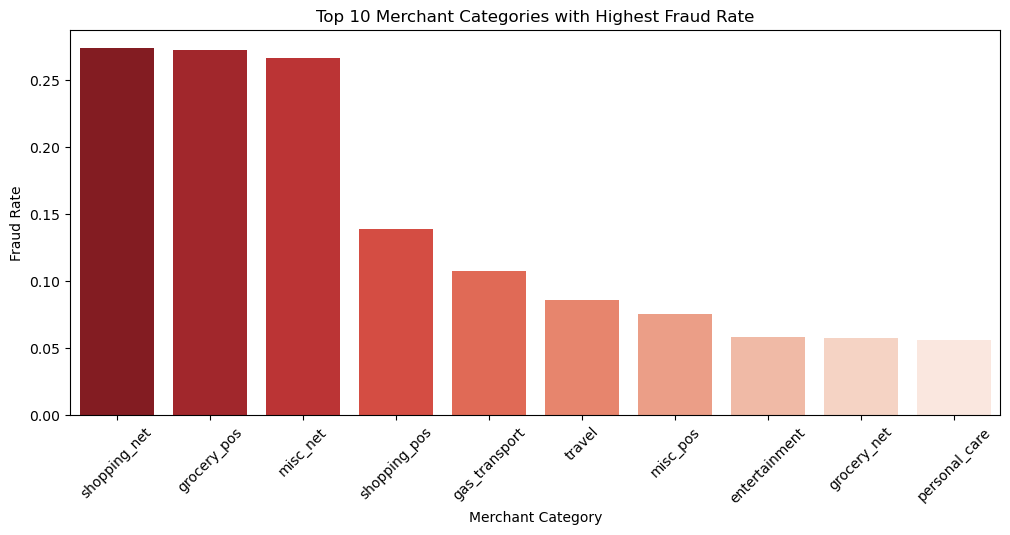

In [15]:
category_fraud_rate = df.groupby('category')['is_fraud'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 5))
sns.barplot(x=category_fraud_rate.index[:10], y=category_fraud_rate.values[:10], palette='Reds_r')
plt.xticks(rotation=45)
plt.title("Top 10 Merchant Categories with Highest Fraud Rate")
plt.xlabel("Merchant Category")
plt.ylabel("Fraud Rate")
plt.show()

### Geographic Anomalies Analysis

In [16]:
df = df.dropna(subset=['lat', 'long', 'merch_lat', 'merch_long'])

In [28]:
from geopy.distance import geodesic

# Function to compute distance
def calculate_distance(row):
    try:
        return geodesic((row['lat'], row['long']), (row['merch_lat'], row['merch_long'])).km
    except:
        return None  # Return None if there's an error

# Apply function to dataset
df['distance_km'] = df.apply(calculate_distance, axis=1)

# Check if distances are now calculated
print(df['distance_km'].describe())

count    14383.000000
mean        75.843568
std         28.692958
min          0.638332
25%         55.426438
50%         77.990319
75%         97.698480
max        143.470225
Name: distance_km, dtype: float64


### Distance between customer and merchant

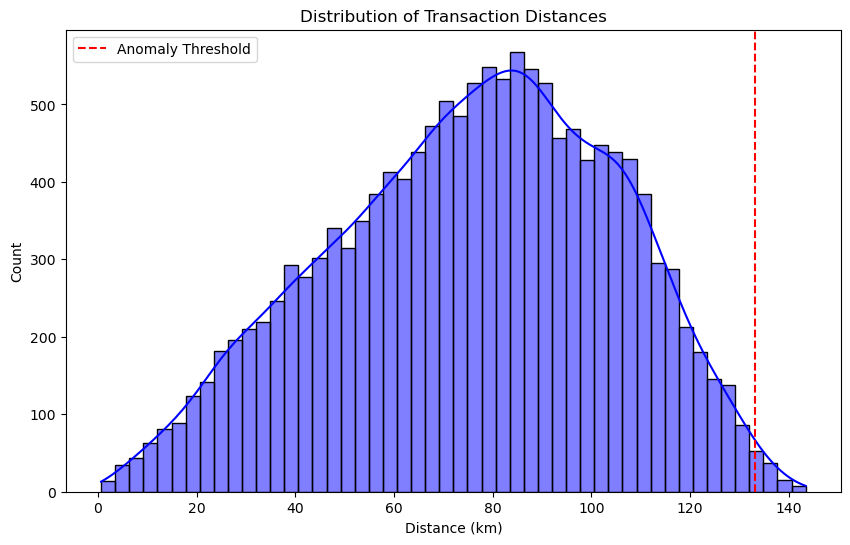

In [18]:
distance_threshold = df['distance_km'].mean() + 2 * df['distance_km'].std()

plt.figure(figsize=(10, 6))
sns.histplot(df['distance_km'], bins=50, kde=True, color='blue')
plt.axvline(distance_threshold, color='red', linestyle='dashed', label='Anomaly Threshold')
plt.title("Distribution of Transaction Distances")
plt.xlabel("Distance (km)")
plt.ylabel("Count")
plt.legend()
plt.show()

In [19]:
customer_last_city = df.groupby('trans_num')['city'].shift(1)
df['sudden_location_change'] = df['city'] != customer_last_city

### Transactions outside normal geography

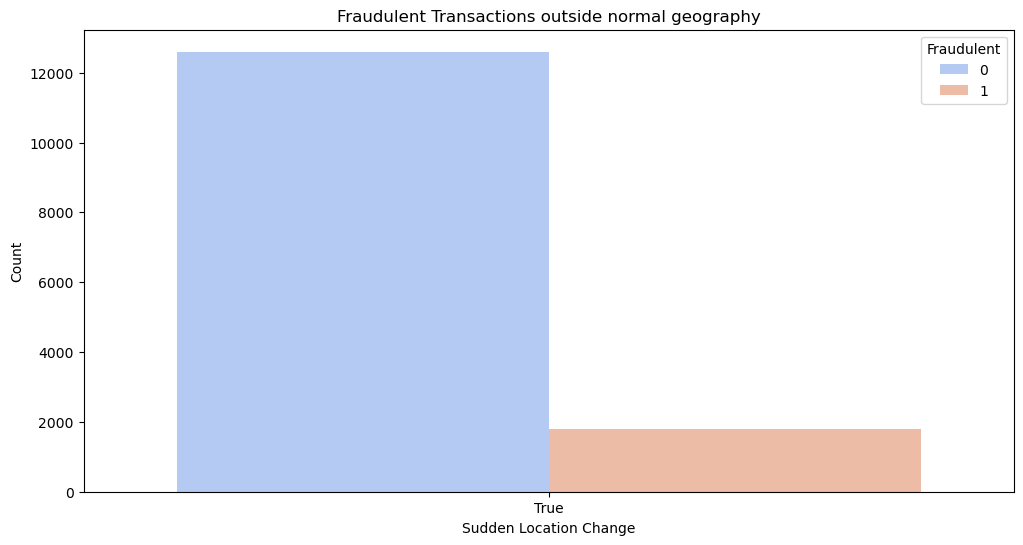

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='sudden_location_change', hue='is_fraud', palette='coolwarm')
plt.title("Fraudulent Transactions outside normal geography")
plt.xlabel("Sudden Location Change")
plt.ylabel("Count")
plt.legend(title="Fraudulent")
plt.show()

### High-risk locations

In [21]:
city_fraud_rate = df.groupby('city')['is_fraud'].mean().sort_values(ascending=False)
high_risk_cities = city_fraud_rate[city_fraud_rate > city_fraud_rate.quantile(0.95)].index
df['high_risk_location'] = df['city'].isin(high_risk_cities)
city_fraud_count = df[df['is_fraud'] == 1]['city'].value_counts()

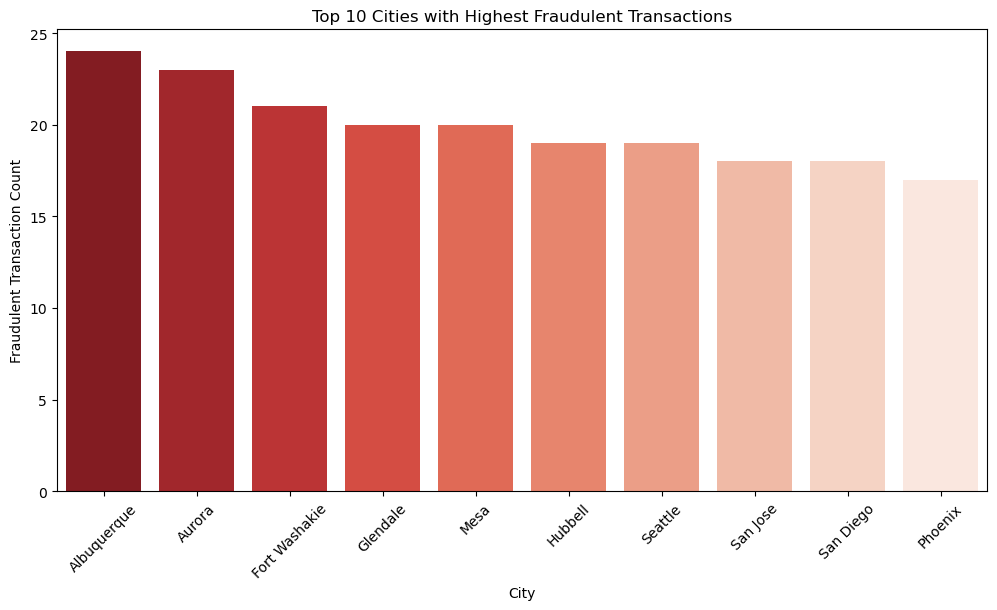

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x=city_fraud_count.index[:10], y=city_fraud_count.values[:10], palette='Reds_r')
plt.xticks(rotation=45)
plt.title("Top 10 Cities with Highest Fraudulent Transactions")
plt.xlabel("City")
plt.ylabel("Fraudulent Transaction Count")
plt.show()

### Feature Engineering

In [23]:
# Create a copy of df to avoid modifying the original dataset
data = df.copy()

# Convert date of birth to age
data['dob'] = pd.to_datetime(data['dob'], errors='coerce')
data['age'] = (pd.to_datetime('today') - data['dob']).dt.days // 365

# Extract time-based features
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['hour_of_day'] = data['trans_date_trans_time'].dt.hour
data['day_of_week'] = data['trans_date_trans_time'].dt.dayofweek
data['is_weekend'] = data['day_of_week'].isin([5, 6]).astype(int)
data['is_night_transaction'] = data['hour_of_day'].apply(lambda x: 1 if x >= 22 or x <= 6 else 0)

# Keep only required columns
data = data[['amt', 'city_pop', 'hour_of_day', 'day_of_week', 'is_weekend',
             'is_night_transaction', 'job', 'city', 'category', 'age', 'is_fraud']]

data

C:\Users\Karan\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14-07-1954' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Karan\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21-06-1974' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Karan\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23-04-1987' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Karan\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '30-11-1987' in DD/MM/YYYY format. Provide format or specif

,amt,city_pop,hour_of_day,day_of_week,is_weekend,is_night_transaction,job,city,category,age,is_fraud
0,14.37,145,0,0,0,1,"""Administrator, education""",Wales,grocery_net,85,1
1,966.11,145,15,0,0,0,"""Administrator, education""",Wales,shopping_net,85,1
2,49.61,145,22,0,0,1,"""Administrator, education""",Wales,misc_pos,85,1
3,295.26,145,23,0,0,1,"""Administrator, education""",Wales,grocery_pos,85,1
4,18.17,145,23,0,0,1,"""Administrator, education""",Wales,health_fitness,85,1
...,...,...,...,...,...,...,...,...,...,...,...
14441,122.00,1302,0,1,0,1,Dealer,Athena,shopping_pos,48,0
14442,9.07,260,0,1,0,1,"""Engineer, maintenance""",Gardiner,misc_pos,69,0
14443,104.84,110,0,1,0,1,"""Administrator, local government""",Alva,grocery_pos,51,0
14444,268.16,145,0,1,0,1,"""Administrator, education""",Wales,shopping_pos,85,0


In [24]:
data.rename(columns={
    'amt': 'Transaction_Amount($)',
    'city_pop': 'City_Population',
    'hour_of_day': 'Transaction_Hour',
    'day_of_week': 'Transaction_DayOfWeek',
    'is_weekend': 'Is_Weekend_Transaction',
    'is_night_transaction': 'Is_Night_Transaction',
    'job': 'Customer_Job',
    'city' : 'City',
    'category': 'Merchant_Category',
    'age': 'Customer_Age',
    'is_fraud' : 'Is_Fraud'
}, inplace=True)

In [25]:
data['Merchant Category'] = data['Merchant_Category'].str.replace('_', ' ')
data = data.drop(columns=['Merchant_Category'])

In [26]:
data

,Transaction_Amount($),City_Population,Transaction_Hour,Transaction_DayOfWeek,Is_Weekend_Transaction,Is_Night_Transaction,Customer_Job,City,Customer_Age,Is_Fraud,Merchant Category
0,14.37,145,0,0,0,1,"""Administrator, education""",Wales,85,1,grocery net
1,966.11,145,15,0,0,0,"""Administrator, education""",Wales,85,1,shopping net
2,49.61,145,22,0,0,1,"""Administrator, education""",Wales,85,1,misc pos
3,295.26,145,23,0,0,1,"""Administrator, education""",Wales,85,1,grocery pos
4,18.17,145,23,0,0,1,"""Administrator, education""",Wales,85,1,health fitness
...,...,...,...,...,...,...,...,...,...,...,...
14441,122.00,1302,0,1,0,1,Dealer,Athena,48,0,shopping pos
14442,9.07,260,0,1,0,1,"""Engineer, maintenance""",Gardiner,69,0,misc pos
14443,104.84,110,0,1,0,1,"""Administrator, local government""",Alva,51,0,grocery pos
14444,268.16,145,0,1,0,1,"""Administrator, education""",Wales,85,0,shopping pos


In [30]:
fraud_counts_by_city = data[data['Is_Fraud'] == 1]['City'].value_counts()
print(fraud_counts_by_city)

Albuquerque      24
Aurora           23
Fort Washakie    21
Glendale         20
Mesa             20
                 ..
Vancouver         3
Odessa            3
Newhall           3
Littleton         2
Laramie           2
Name: City, Length: 172, dtype: int64


### Model Selection

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [32]:
data1 = data.copy()

X = data1.drop(columns=['Is_Fraud'])  # Drop target column
y = data1['Is_Fraud']

### Label Encoding

In [33]:
cat_cols = ['Customer_Job', 'City', 'Merchant Category']
encoder = LabelEncoder()
for col in cat_cols:
    X[col] = encoder.fit_transform(X[col])

In [35]:
X.head()

,Transaction_Amount($),City_Population,Transaction_Hour,Transaction_DayOfWeek,Is_Weekend_Transaction,Is_Night_Transaction,Customer_Job,City,Customer_Age,Merchant Category
0,14.37,145,0,0,0,1,1,166,85,3
1,966.11,145,15,0,0,0,1,166,85,11
2,49.61,145,22,0,0,1,1,166,85,9
3,295.26,145,23,0,0,1,1,166,85,4
4,18.17,145,23,0,0,1,1,166,85,5


In [36]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Is_Fraud, dtype: int32

### Train-Test-Split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Model Training

In [38]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Predictions & Evaluation

In [39]:
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.9795
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2521
           1       0.94      0.89      0.91       356

    accuracy                           0.98      2877
   macro avg       0.96      0.94      0.95      2877
weighted avg       0.98      0.98      0.98      2877



### Feature Importance

In [40]:
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

In [41]:
print("\nTop Features:")
print(feature_importances.head(10))


Top Features:
                  Feature  Importance
0   Transaction_Amount($)    0.603224
2        Transaction_Hour    0.095849
9       Merchant Category    0.094540
5    Is_Night_Transaction    0.059630
8            Customer_Age    0.041911
1         City_Population    0.028841
6            Customer_Job    0.027290
7                    City    0.026990
3   Transaction_DayOfWeek    0.018006
4  Is_Weekend_Transaction    0.003718


### Confusion Matrix

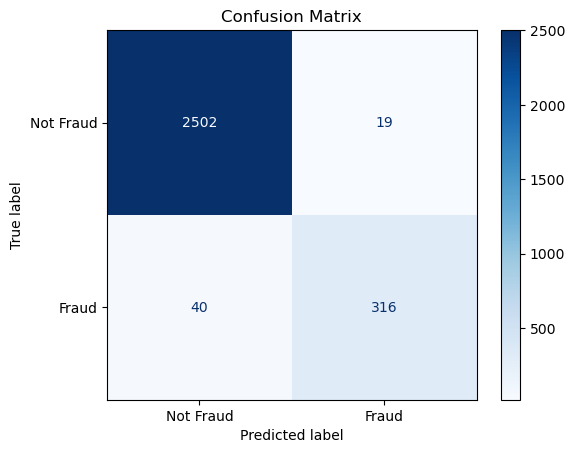

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### Precision-Recall Curve

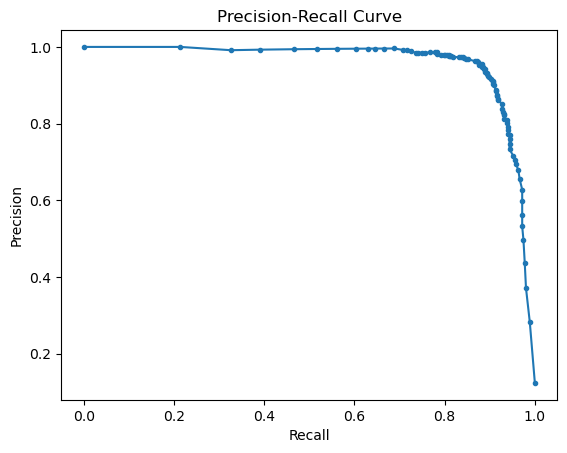

In [43]:
from sklearn.metrics import precision_recall_curve

y_prob = rf_model.predict_proba(X_test)[:, 1]  # Probability of class 1 (Fraud)

precision, recall, _ = precision_recall_curve(y_test, y_prob)

precision, recall, _ = precision_recall_curve(y_test, y_prob)  # y_prob = model.predict_proba(X_test)[:,1]
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

### Save the trained model

In [45]:
import joblib

joblib.dump(rf_model, 'fraud_detection_model.pkl')
print("Model saved successfully!")

Model saved successfully!


In [47]:
import pickle

with open('fraud_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)